In [1]:
from IPython.core.display import Markdown, display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
plt.rcParams['axes.axisbelow'] = True

import sys
import os
from os import path

from plot_in_out_dist import plot_in_out_dist

out_dir = "example_plots"

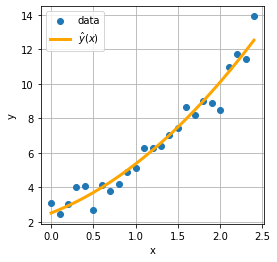

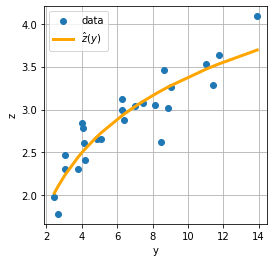

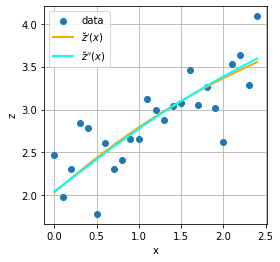

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

t_xy = lambda x: 1 + (1 + x)**2
t_yx = lambda y: np.sqrt(y - 1) - 1

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(0.0, 2.5, 0.1)})
np.random.seed(0)
d1['y'] = t_xy(d1.x) + np.random.normal(0.0, 0.6, len(d1.x))
np.random.seed(0)
d1['z'] = t_yz(d1.y) + np.random.normal(0.0, 0.2, len(d1.y))

d1_1 = d1.sort_values(by='x')
x_est_1 = d1_1.x.values
model_1 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(t_xy(x_est_1.reshape(-1, 1)), d1.y)
y_est_1 = model_1.predict(t_xy(x_est_1.reshape(-1, 1)))

fig = plt.figure()
plt.grid()
plt.scatter(d1.x, d1.y, label='data')
plt.plot(x_est_1, y_est_1, color='orange', linewidth=3, label='$\hat{y}(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/x-y--linear-regression.pdf", bbox_inches='tight')
plt.show()

d1_2 = d1.sort_values(by='y')
y_est_2 = d1_2.y.values
model_2 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(t_yz(y_est_2.reshape(-1, 1)), d1_2.z)
z_est_2 = model_2.predict(t_yz(y_est_2.reshape(-1, 1)))

fig = plt.figure()
plt.grid()
plt.scatter(d1.y, d1.z, label='data')
plt.plot(y_est_2, z_est_2, color='orange', linewidth=3, label='$\hat{z}(y)$')
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/y-z--linear-regression.pdf", bbox_inches='tight')
plt.show()

d1_3 = d1.sort_values(by='x')
x_est_3 = d1_3.x.values
model_3 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(t_yz(t_xy(x_est_3.reshape(-1, 1))), d1_2.z)
z_est_3 = model_3.predict(t_yz(t_xy(x_est_3.reshape(-1, 1))))

fig = plt.figure()
plt.grid()
plt.scatter(d1.x, d1.z, label='data')
plt.plot(x_est_3, z_est_3, color='orange', linewidth=2, label=r"$\breve{z}'(x)$")

y_comp_est = model_1.predict(t_xy(x_est_1.reshape(-1, 1)))
z_comp_est = model_2.predict(t_yz(y_comp_est.reshape(-1, 1)))

plt.plot(x_est_1, z_comp_est, color='cyan', linewidth=2, label=r"$\breve{z}''(x)$")
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/x-z--linear-regression.pdf", bbox_inches='tight')
plt.show()

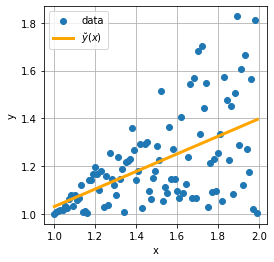

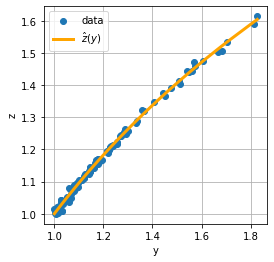

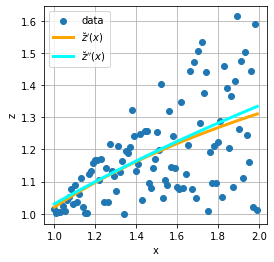

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

t_xy = lambda x: x
t_yx = lambda y: y

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(1.0, 2.0, 0.01)})
np.random.seed(0)
d1['y'] = np.random.uniform(1.0, t_xy(d1.x), len(d1.x))
np.random.seed(1)
# d1['z'] = t_yz(d1.y)
d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .01, len(d1.y))


d1_1 = d1.sort_values(by='x')
x_est_1 = d1_1.x.values
model_1 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(t_xy(x_est_1.reshape(-1, 1)), d1.y)
y_est_1 = model_1.predict(t_xy(x_est_1.reshape(-1, 1)))

fig = plt.figure()
plt.scatter(d1.x, d1.y, label='data')
plt.plot(x_est_1, y_est_1, color='orange', linewidth=3, label=r"$\breve{y}(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/x-y--uniform-linear-regression.pdf", bbox_inches='tight')
plt.show()

d1_2 = d1.sort_values(by='y')
y_est_2 = d1_2.y.values
model_2 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(t_yz(y_est_2.reshape(-1, 1)), d1_2.z)
z_est_2 = model_2.predict(t_yz(y_est_2.reshape(-1, 1)))

fig = plt.figure()
plt.scatter(d1.y, d1.z, label='data')
plt.plot(y_est_2, z_est_2, color='orange', linewidth=3, label=r"$\hat{z}(y)$")
plt.xlabel('y')
plt.ylabel('z')
plt.legend()
plt.grid()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/y-z--uniform-linear-regression.pdf", bbox_inches='tight')
plt.show()

d1_3 = d1.sort_values(by='x')
x_est_3 = d1_3.x.values
model_3 = make_pipeline(PolynomialFeatures(1), LinearRegression()).fit(t_yz(t_xy(x_est_3.reshape(-1, 1))), d1_3.z)
z_est_3 = model_3.predict(t_yz(t_xy(x_est_3.reshape(-1, 1))))

fig = plt.figure()
plt.scatter(d1.x, d1.z, label='data')
plt.plot(x_est_3, z_est_3, color='orange', linewidth=3, label=r"$\breve{z}'(x)$")


y_comp_est = model_1.predict(t_xy(x_est_1.reshape(-1, 1)))
z_comp_est = model_2.predict(t_yz(y_comp_est.reshape(-1, 1)))

plt.plot(x_est_1, z_comp_est, color='cyan', linewidth=3, label=r"$\breve{z}''(x)$")
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.grid()
fig.set_size_inches([4, 4])
fig.savefig(f"{out_dir}/x-z--uniform-linear-regression.pdf", bbox_inches='tight')
plt.show()

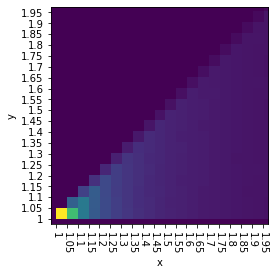

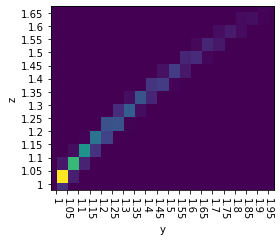

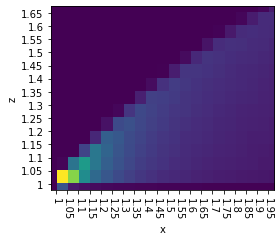

In [4]:

t_xy = lambda x: x
t_yx = lambda y: y

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(1.0, 2.0, 0.000001)})
np.random.seed(0)
d1['y'] = np.random.uniform(1.0, t_xy(d1.x), len(d1.x))
np.random.seed(1)
# d1['z'] = t_yz(d1.y)
d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .01, len(d1.y))

plot_in_out_dist(
    x_metric=d1.x,
    y_metric=d1.y,
    x_bin_width=0.05,
    y_bin_width=0.05,
    selected_df=d1,
    x_lim=(0.95, 1.95),
    y_lim=(0.95, 1.95),
    out_dir=out_dir,
)
plot_in_out_dist(
    x_metric=d1.y,
    y_metric=d1.z,
    x_bin_width=0.05,
    y_bin_width=0.05,
    selected_df=d1,
    x_lim=(0.95, 1.95),
    y_lim=(0.95, 1.65),
    out_dir=out_dir,
)
plot_in_out_dist(
    x_metric=d1.x,
    y_metric=d1.z,
    x_bin_width=0.05,
    y_bin_width=0.05,
    selected_df=d1,
    x_lim=(0.95, 1.95),
    y_lim=(0.95, 1.65),
    out_dir=out_dir,
)

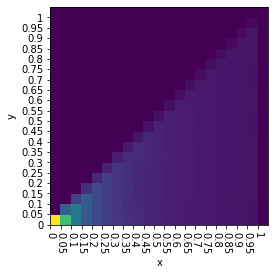

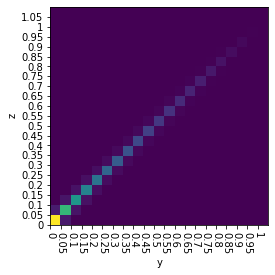

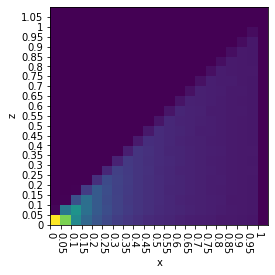

In [5]:

t_xy = lambda x: x
t_yx = lambda y: y

t_yz = lambda y: y
t_zy = lambda z: z

d1 = pd.DataFrame({'x': np.arange(0.0, 1.0, 0.000001)})
np.random.seed(0)
d1['y'] = np.random.uniform(0.0, t_xy(d1.x), len(d1.x))
np.random.seed(1)
# d1['z'] = t_yz(d1.y)
d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .01, len(d1.y))

plot_in_out_dist(
    x_metric=d1.x,
    y_metric=d1.y,
    x_bin_width=0.05,
    y_bin_width=0.05,
    selected_df=d1,
#     x_lim=(0.975, 1.95),
#     y_lim=(0.975, 1.95),
    out_dir=out_dir,
)
plot_in_out_dist(
    x_metric=d1.y,
    y_metric=d1.z,
    x_bin_width=0.05,
    y_bin_width=0.05,
    selected_df=d1,
#     x_lim=(0.975, 1.95),
#     y_lim=(0.975, 1.95),
    out_dir=out_dir,
)
plot_in_out_dist(
    x_metric=d1.x,
    y_metric=d1.z,
    x_bin_width=0.05,
    y_bin_width=0.05,
    selected_df=d1,
#     x_lim=(0.975, 2.05),
#     y_lim=(0.975, 2.05),
    out_dir=out_dir,
)

y | x between 1.2, 1.3


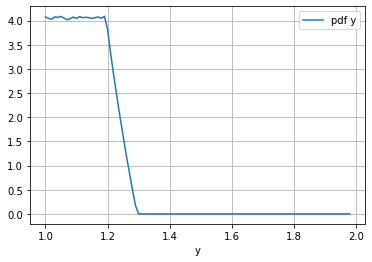

In [ ]:

t_xy = lambda x: x
t_yx = lambda y: y

t_yz = lambda y: np.log(y) + 1
t_zy = lambda z: np.exp(z - 1)

d1 = pd.DataFrame({'x': np.arange(1.0, 2.0, 1/10000000)})
np.random.seed(0)
d1['y'] = np.random.uniform(1.0, t_xy(d1.x), len(d1.x))
np.random.seed(1)
d1['z'] = t_yz(d1.y)
# d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .01, len(d1.y))


print("y | x between 1.2, 1.3")
b_y_size = 0.01
y_count, y_bins = np.histogram(d1[d1.x.between(1.2, 1.3)].y, bins=np.arange(1, d1.x.max(), b_y_size))
pdf_y = y_count / np.sum(y_count) / b_y_size
plt.plot(y_bins[:-1], pdf_y, label='pdf y')
plt.xlabel('y')
# plt.ylabel('pdf(y)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_y*b_y_size) > .999) # integral of pdf == 1


print("z | y between 1.0, 1.2")
b_z_size = 0.01
z_count, z_bins = np.histogram(d1[d1.y.between(1.0, 1.2)].z, bins=np.arange(1, d1.z.max(), b_z_size))
pdf_z = z_count / np.sum(z_count) / b_z_size
plt.plot(z_bins[:-1], pdf_z, label='pdf z')
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1

print("z | y between 1.0, 1.3")
b_z_size = 0.01
z_count, z_bins = np.histogram(d1[d1.y.between(1.0, 1.3)].z, bins=np.arange(1, d1.z.max(), b_z_size))
pdf_z = z_count / np.sum(z_count) / b_z_size
plt.plot(z_bins[:-1], pdf_z, label='pdf z')
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1


print("z | x between 1.2, 1.3")
b_z_size = 0.01
z_count, z_bins = np.histogram(d1[d1.x.between(1.2, 1.3)].z, bins=np.arange(1, d1.z.max(), b_z_size))
pdf_z = z_count / np.sum(z_count) / b_z_size
plt.plot(z_bins[:-1], pdf_z, label='pdf z')
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1

In [ ]:

t_xy = lambda x: x
t_yx = lambda y: y

t_yz = lambda y: y
t_zy = lambda z: z

d1 = pd.DataFrame({'x': np.arange(0.0, 1.0, 1/100000000)})
np.random.seed(0)
d1['y'] = np.random.uniform(0.0, t_xy(d1.x), len(d1.x))
np.random.seed(1)
d1['z'] = t_yz(d1.y)
# d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .01, len(d1.y))


print("y | x between 0.2, 0.3")
b_y_size = 0.01
y_count, y_bins = np.histogram(d1[d1.x.between(0.2, 0.3)].y, bins=np.arange(0, 1, b_y_size))
pdf_y = y_count / np.sum(y_count) / b_y_size
plt.plot(y_bins[:-1], pdf_y, label='pdf y')
plt.xlabel('y')
# plt.ylabel('pdf(y)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_y*b_y_size) > .999) # integral of pdf == 1


print("z | y between 0.0, 0.2")
b_z_size = 0.01
z_count, z_bins = np.histogram(d1[d1.y.between(0.0, 0.2)].z, bins=np.arange(0, 1, b_z_size))
pdf_z = z_count / np.sum(z_count) / b_z_size
plt.plot(z_bins[:-1], pdf_z, label='pdf z')
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1

print("z | y between 0.0, 0.3")
b_z_size = 0.01
z_count, z_bins = np.histogram(d1[d1.y.between(0.0, 0.3)].z, bins=np.arange(0, 1, b_z_size))
pdf_z = z_count / np.sum(z_count) / b_z_size
plt.plot(z_bins[:-1], pdf_z, label='pdf z')
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1


print("z | x between 1.2, 1.3")
b_z_size = 0.01
z_count, z_bins = np.histogram(d1[d1.x.between(0.2, 0.3)].z, bins=np.arange(0, 1, b_z_size))
pdf_z = z_count / np.sum(z_count) / b_z_size
plt.plot(z_bins[:-1], pdf_z, label='pdf z')
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1

In [ ]:

t_xy = lambda x: x
t_yx = lambda y: y

t_yz = lambda y: y
t_zy = lambda z: z

d1 = pd.DataFrame({'x': np.arange(0.0, 1.0, 1/10000000)})
np.random.seed(0)
d1['y'] = np.random.uniform(0.0, t_xy(d1.x), len(d1.x))
np.random.seed(1)
d1['z'] = t_yz(d1.y)
# d1['z'] = t_yz(d1.y) + np.random.normal(0.0, .01, len(d1.y))


print("y | x between 0.2, 0.3")
b_y_size = 0.1
y_count, y_bins = np.histogram(d1[d1.x.between(0.2, 0.3)].y, bins=np.arange(0, 1, b_y_size))
pdf_y = y_count / np.sum(y_count)
plt.bar(y_bins[:-1], pdf_y, label='PMF y', fill=False, width=b_y_size)
plt.xlabel('y')
# plt.ylabel('pdf(y)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_y*b_y_size) > .999) # integral of pdf == 1


print("z | y between 0.0, 0.2")
b_z_size = 0.1
z_count, z_bins = np.histogram(d1[d1.y.between(0.0, 0.2)].z, bins=np.arange(0, 1, b_z_size))
pdf_z = z_count / np.sum(z_count)
plt.bar(z_bins[:-1], pdf_z, label='PMF z', fill=False, width=b_z_size)
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1

print("z | y between 0.0, 0.3")
b_z_size = 0.1
z_count, z_bins = np.histogram(d1[d1.y.between(0.0, 0.3)].z, bins=np.arange(0, 1, b_z_size))
pdf_z = z_count / np.sum(z_count)
plt.bar(z_bins[:-1], pdf_z, label='PMF z', fill=False, width=b_z_size)
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1


print("z | x between 1.2, 1.3")
b_z_size = 0.1
z_count, z_bins = np.histogram(d1[d1.x.between(0.2, 0.3)].z, bins=np.arange(0, 1, b_z_size))
pdf_z = z_count / np.sum(z_count)
plt.bar(z_bins[:-1], pdf_z, label='PMF z', fill=False, width=b_z_size)
plt.xlabel('z')
# plt.ylabel('pdf(z)')
plt.legend()
plt.grid()
plt.show()
# print(np.sum(pdf_z*b_z_size) > .999) # integral of pdf == 1